In [1]:
#FITS File: '/users/mirandaviederman/Downloads/FITS Files/apStar-r8-2M16470110-0239298.fits'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
import astropy
from astropy.io import fits

In [4]:
hduN = fits.open('/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16470110-0239298.fits')
hduN.info()

Filename: /users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16470110-0239298.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1                1 ImageHDU        13   (8575, 4)   float32   
  2                1 ImageHDU        13   (8575, 4)   float32   
  3                1 ImageHDU        13   (8575, 4)   int16   
  4                1 ImageHDU        13   (8575, 4)   float32   
  5                1 ImageHDU        13   (8575, 4)   float32   
  6                1 ImageHDU        13   (8575, 4)   float32   
  7                1 ImageHDU        13   (8575, 4)   float32   
  8                1 ImageHDU        29   (26,)   float64   
  9                1 BinTableHDU     90   1R x 33C   [60A, 2I, 8A, 2J, 2I, 2D, 2E, 2E, 2E, 2E, 2I, 2E, 2E, 2E, 2E, E, E, E, E, E, 2E, 2E, 2E, 2E, 2E, 2E, 2E, 1604E, 1604E, 401E, D, D, 401E]   


In [5]:
hduS = fits.open('/users/mirandaviederman/Downloads/FITS Files/S_data/apStar-t9-2M16470110-0239298.fits')
hduS.info()

Filename: /users/mirandaviederman/Downloads/FITS Files/S_data/apStar-t9-2M16470110-0239298.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     158   ()      
  1                1 ImageHDU        13   (8575, 5)   float32   
  2                1 ImageHDU        13   (8575, 5)   float32   
  3                1 ImageHDU        13   (8575, 5)   int16   
  4                1 ImageHDU        13   (8575, 5)   float32   
  5                1 ImageHDU        13   (8575, 5)   float32   
  6                1 ImageHDU        13   (8575, 5)   float32   
  7                1 ImageHDU        13   (8575, 5)   float32   
  8                1 ImageHDU        29   (26,)   float64   
  9                1 BinTableHDU     90   1R x 33C   [90A, 3I, 36A, 3J, 3I, 3D, 3E, 3E, 3E, 3E, 2I, 2E, 2E, 2E, 2E, E, E, E, E, E, 3E, 3E, 3E, 3E, 3E, 3E, 3E, 2005E, 2005E, 401E, D, D, 401E]   


   ## Comparative Plot

#### North -- APO

In [6]:
fluxesN = np.atleast_2d(hduN[1].data)
NexpN, NpixN = fluxesN.shape
wavelengthsN = 10. ** (hduN[0].header["CRVAL1"] + hduN[0].header["CDELT1"] * np.arange(NpixN))

#### South -- LCO

In [7]:
fluxesS = np.atleast_2d(hduS[1].data)
NexpS, NpixS = fluxesS.shape
wavelengthsS = 10. ** (hduS[0].header["CRVAL1"] + hduS[0].header["CDELT1"] * np.arange(NpixS))

### Plotting

<IPython.core.display.Javascript object>


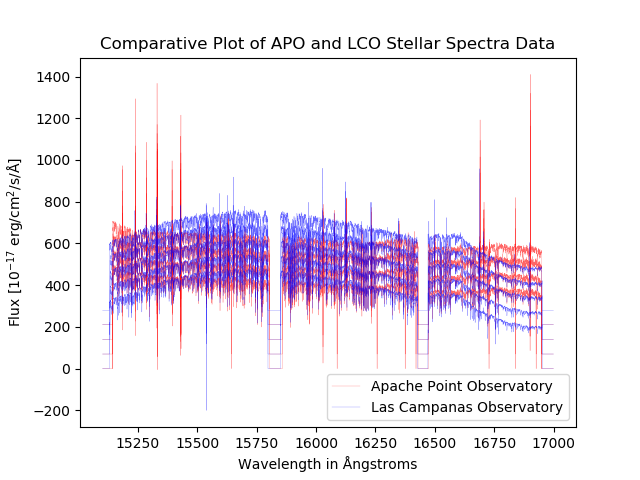

In [9]:
for exp in range(NexpN):
    if exp==0:
        plt.step(wavelengthsN, 70*exp+fluxesN[exp], color='r', linewidth=.2, alpha=0.6, label='Apache Point Observatory')
    else:
         plt.step(wavelengthsN, 70*exp+fluxesN[exp], color='r', linewidth=.2, alpha=0.6, label='_nolegend_')
            
for exp in range(NexpS):
    if exp==0:
        plt.step(wavelengthsS, 70*exp+fluxesS[exp], color='b', linewidth=.2, alpha=0.6, label='Las Campanas Observatory')
    else:
        plt.step(wavelengthsS, 70*exp+fluxesS[exp], color='b', linewidth=.2, alpha=0.6, label='_nolegend')

plt.legend(loc='best')
plt.ylabel(r'Flux [$10^{-17}$ erg/cm$^2$/s/Å]')
plt.xlabel("Wavelength in Ångstroms")
plt.title('Comparative Plot of APO and LCO Stellar Spectra Data');

### Note: this seems to be a trend - where Northern data remains focused around one line of fit, Southern data displays more of a curve shape. Is this a problem in the telescope or is there a scientific explanation to which this can be attributed? The same effect can be seen in Comp_plot3.ipynb.